## Method 1: 

shuffle the CVS dataset

then regenerate genealogy graph

to see if the new graph looks prettier

In [6]:
import pandas as pd
import build_genealogy_graph

In [29]:
df = pd.read_csv('data/parent_child_weights.csv')

In [30]:
df

,parent,child,weight
0,PlantBasedDiet,Fitness,0.013841
1,whole30,Fitness,0.048443
2,powerlifting,Fitness,0.178777
3,running,Fitness,0.207612
4,keto,Fitness,0.057670
...,...,...,...
74,keto,lowcarb,0.803279
75,whole30,lowcarb,0.098361
76,Paleo,whole30,1.000000
77,nutrition,1200isplenty,1.000000


In [107]:
ds = pd.concat([df[:1], df[1:].sample(frac=1)]).reset_index(drop=True)

In [108]:
ds

,parent,child,weight
0,PlantBasedDiet,Fitness,0.013841
1,1200isplenty,bodyweightfitness,0.044563
2,whole30,PlantBasedDiet,0.140351
3,Fitness,bodyweightfitness,0.247772
4,bodybuilding,keto,0.122164
...,...,...,...
74,naturalbodybuilding,PlantBasedDiet,0.066667
75,PlantBasedDiet,bodyweightfitness,0.021390
76,running,Fitness,0.207612
77,bodyweightfitness,running,0.124370


In [109]:
ds.to_csv('data/shuffled_dataset.csv')

In [110]:
build_genealogy_graph.draw_graph("data/shuffled_dataset.csv", 
                                 "prettier_output.png", 
                                 threshold=0.1)

## Method 2:

redraw the graph myself

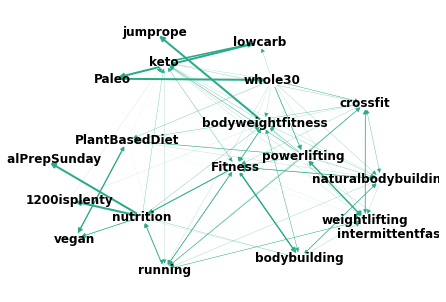

In [133]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Read CSV data
with open("data/parent_child_weights.csv", "r") as file:
    data = list(csv.DictReader(file))

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for row in data:
    parent = row["parent"]
    child = row["child"]
    weight = float(row["weight"])
    G.add_edge(parent, child, weight=weight)

# Set the edge widths proportional to edge weights
edge_widths = [G[u][v]["weight"] * 2 for u, v in G.edges()]

# Draw the graph
pos = nx.spring_layout(G, seed=5, k=1.1)
nx.draw(G, pos, with_labels=True, font_color="black", edge_color="#2AAA8A", node_size=150, node_color="white", font_size=12, font_weight="bold", width=edge_widths)
plt.savefig("my_plotted_graph.png", dpi=300, bbox_inches="tight")
plt.show()